# Predict Clicked Ads Customer Classification

In [2]:
import pandas as pd
df = pd.read_csv('Clicked Ads Dataset.csv')
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


# Cleaning

In [3]:
df = df.drop('Unnamed: 0', axis='columns')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['month'] = df['Timestamp'].dt.month
df['timestamp'] = df['Timestamp'].dt.strftime('%m/%d/%Y')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,hour,month,timestamp
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,0,3,03/27/2016
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,1,4,04/04/2016
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,20,3,03/13/2016
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2,1,01/10/2016
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,3,6,06/03/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,21,2,02/11/2016
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,2,4,04/22/2016
997,NaN,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,17,2,02/01/2016
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,2,3,03/24/2016


# Goals
1. Efektifitas Ads 
2. Daily time spent customer
3. Semakin banyak daily time spent maka banyak user yang melihat

In [5]:
df_clean = df.dropna()
df_clean

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,hour,month,timestamp
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,0,3,03/27/2016
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,1,4,04/04/2016
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,20,3,03/13/2016
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2,1,01/10/2016
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,3,6,06/03/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,43.70,28,441888720.0,173.01,Perempuan,2016-04-04 03:57:00,Yes,Tasikmalaya,Jawa Barat,Fashion,3,4,04/04/2016
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,21,2,02/11/2016
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,2,4,04/22/2016
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,2,3,03/24/2016


# Feature Engineering

In [6]:
df_clean.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,hour,month,timestamp
616,52.70,41,287417480.0,109.34,Laki-Laki,2016-01-31 08:50:00,Yes,Makassar,Sulawesi Selatan,House,8,1,01/31/2016
20,77.22,30,453616310.0,224.44,Laki-Laki,2016-01-05 07:52:00,No,Malang,Jawa Timur,House,7,1,01/05/2016
318,80.72,31,480304860.0,186.37,Perempuan,2016-04-19 05:15:00,No,Medan,Sumatra Utara,Otomotif,5,4,04/19/2016
69,78.53,34,227758860.0,131.72,Perempuan,2016-04-22 20:10:00,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Fashion,20,4,04/22/2016
711,69.96,31,513897090.0,214.06,Laki-Laki,2016-05-20 12:17:00,No,Tangerang,Banten,Food,12,5,05/20/2016


In [7]:
# mapnum = set(df_clean[['Male', 'Clicked on Ad', 'category']])
# for x in mapnum:
#     for i, x in enumerate(set(df_clean[x]), start=1):
#         mapnum = x:i

In [8]:
set(df_clean.category)

{'Bank',
 'Electronic',
 'Fashion',
 'Finance',
 'Food',
 'Furniture',
 'Health',
 'House',
 'Otomotif',
 'Travel'}

In [9]:
male_mapping = {'Perempuan':0,
                'Laki-Laki':1}
df_clean['male'] = df_clean['Male'].map(male_mapping)

ad_mapping = {'No':0,
              'Yes':1}
df_clean['adclicked'] = df_clean['Clicked on Ad'].map(ad_mapping)

cat_mapping = {'Bank':0,
               'Electronic':1,
               'Fashion':2,
               'Finance':3,
               'Food':4,
               'Furniture':5,
               'Health':6,
               'House':7,
               'Otomotif':8,
               'Travel':9}
df_clean['catego'] = df_clean['category'].map(cat_mapping)

C:\Users\User\AppData\Local\Temp\ipykernel_39728\1076106485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['male'] = df_clean['Male'].map(male_mapping)
C:\Users\User\AppData\Local\Temp\ipykernel_39728\1076106485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['adclicked'] = df_clean['Clicked on Ad'].map(ad_mapping)
C:\Users\User\AppData\Local\Temp\ipykernel_39728\1076106485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

<Axes: title={'center': 'Correlation on Feature'}>

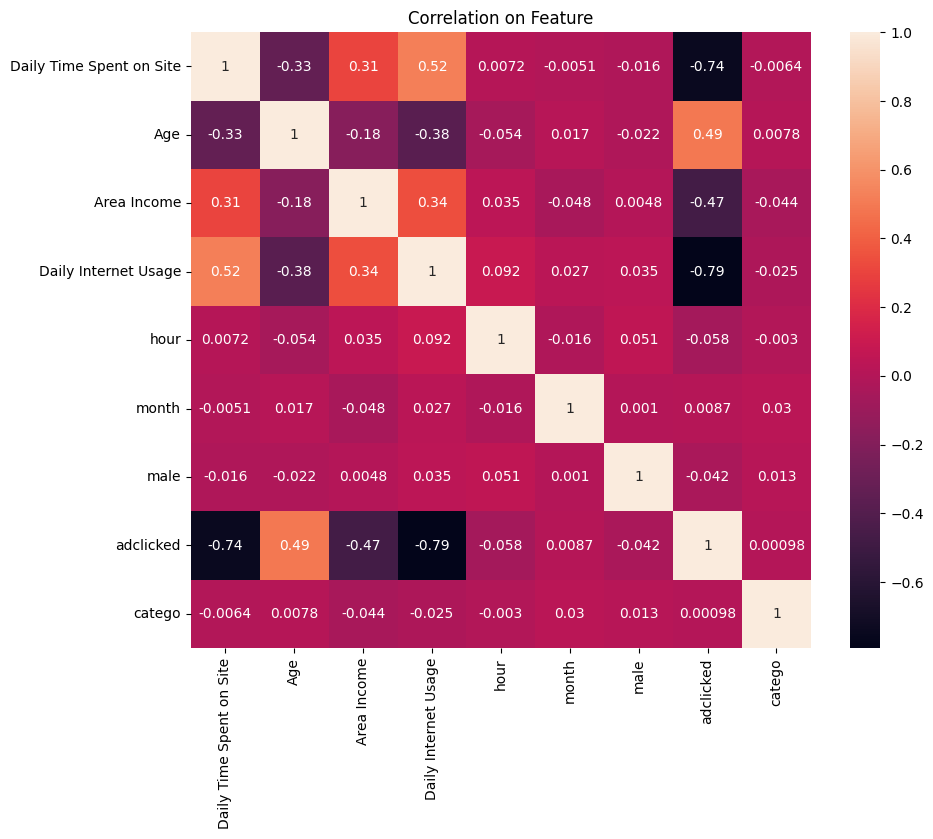

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Correlation on Feature')
sns.heatmap(df_clean.select_dtypes(['float', 'int']).corr(), annot=True)

# Daily Time Spent on Site Wise

In [11]:
def pie_plot(value):
        for x in value:
                print(f"Results for grouping by {x}:")
        
                # Display grouped data in a table format
                grouped_data = df_clean.groupby(
                        x).agg({
                                'Daily Time Spent on Site': 'sum'}).sort_values(
                                        'Daily Time Spent on Site', 
                                        ascending=False).reset_index()
                display(grouped_data)
                
                # Display pie chart
                plt.figure(figsize=(10, 6))
                plt.pie(grouped_data['Daily Time Spent on Site'], 
                        labels=grouped_data[x], 
                        autopct='%.0f%%')
                plt.title(f"Distribution of Daily Time Spent on Site by {x}")
                plt.show()

In [37]:
def bar_plot(value, df_clean):
    for a in value:
        print(f"Results for grouping by {a}:")
        
        # Group the data by the specified column and aggregate
        grouped_data = df_clean.groupby(a).agg({'Daily Time Spent on Site': 'sum'}).sort_values('Daily Time Spent on Site', ascending=False).reset_index()
        
        # Calculate the percentage of total for each group
        total_time_spent = grouped_data['Daily Time Spent on Site'].sum()
        grouped_data['Percentage'] = (grouped_data['Daily Time Spent on Site'] / total_time_spent) * 100
        
        # Display the grouped data with percentages
        display(grouped_data)
        
        # Create the bar plot using the percentage data
        plt.figure(figsize=(15, 6))
        bar_plot = sns.barplot(x=a, y='Percentage', data=grouped_data)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)
        
        # Set the plot title
        plt.title(f"Distribution of Daily Time Spent on Site by {a} (Percentage)")
        
        # Add percentage annotations on each bar
        for p in bar_plot.patches:
            percentage = f'{p.get_height():.2f}'  # Format the percentage to 2 decimal places
            bar_plot.annotate(
                percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the annotation
                ha='center',
                va='center',
                fontsize=12,
                color='black',
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points'
            )
        
        # Display the plot
        plt.show()

Results for grouping by city:


,city,Daily Time Spent on Site,Percentage
0,Bandung,4133.26,6.620576
1,Jakarta Timur,3938.74,6.308998
2,Jakarta Selatan,3909.75,6.262562
3,Surabaya,3900.72,6.248098
4,Jakarta Barat,3836.15,6.144671
5,Bekasi,3589.47,5.749544
6,Medan,2978.60,4.771064
7,Jakarta Utara,2929.16,4.691872
8,Semarang,2536.39,4.062740
9,Palembang,2440.12,3.908537


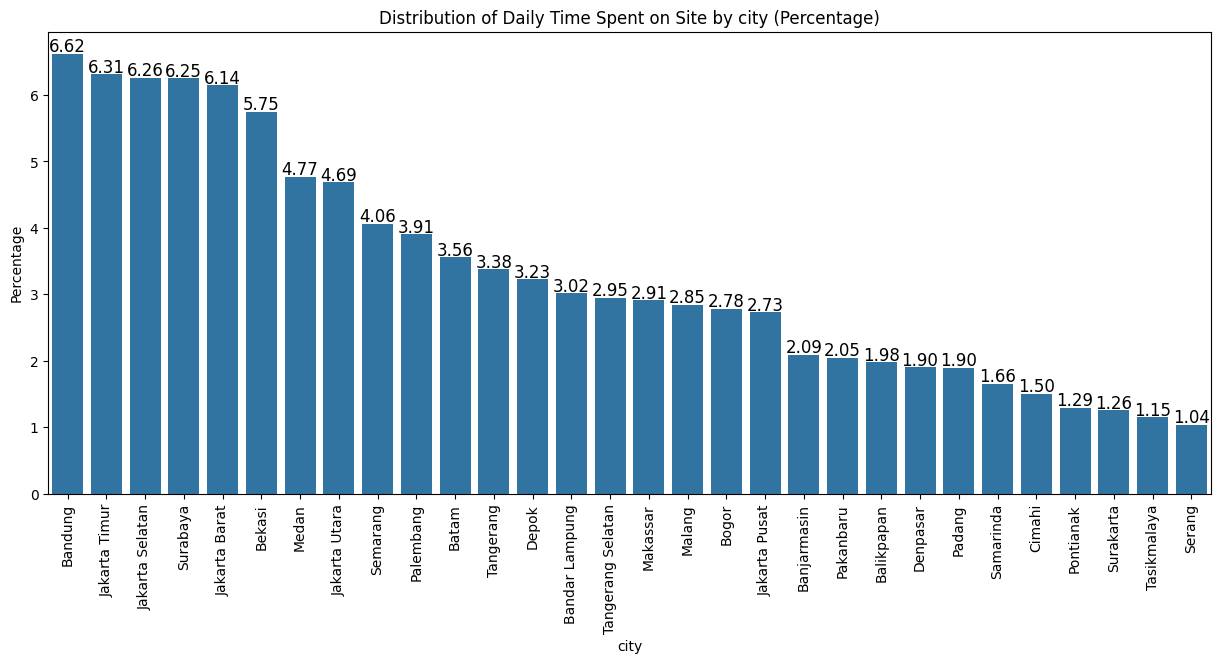

In [38]:
bar_plot(['city'], df_clean)

Results for grouping by Male:


,Male,Daily Time Spent on Site
0,Perempuan,32668.32
1,Laki-Laki,29762.20


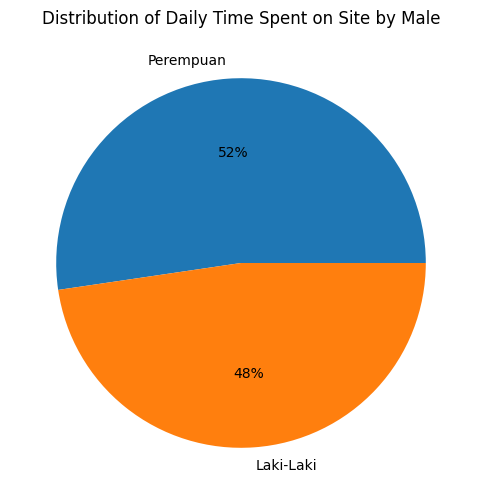

In [ ]:
pie_plot(['Male'])

Results for grouping by Clicked on Ad:


,Clicked on Ad,Daily Time Spent on Site
0,No,36680.29
1,Yes,25750.23


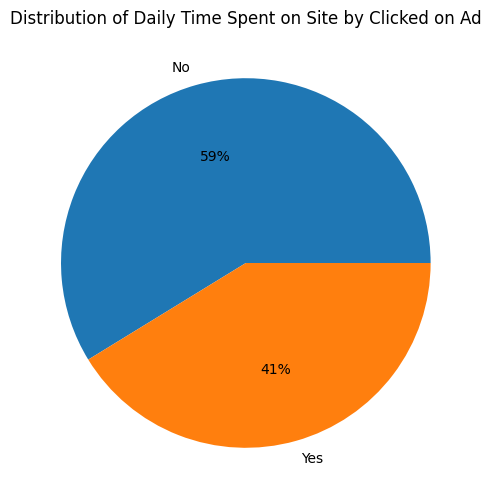

In [ ]:
pie_plot(['Clicked on Ad'])

Results for grouping by category:


,category,Daily Time Spent on Site
0,Otomotif,6960.43
1,House,6789.95
2,Health,6613.16
3,Fashion,6293.05
4,Furniture,6291.41
5,Food,6273.65
6,Electronic,6005.53
7,Travel,5999.00
8,Bank,5873.87
9,Finance,5330.47


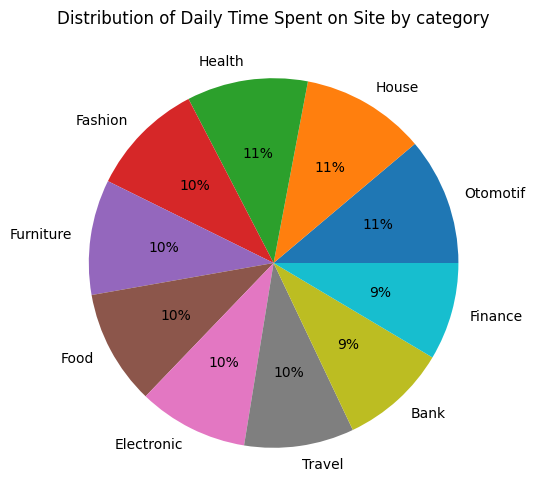

In [ ]:
pie_plot(['category'])

# Details

In [ ]:
df_clean.select_dtypes(['float', 'int']).describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,hour,month,male,adclicked,catego
count,963.000000,963.000000,9.630000e+02,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,64.829200,36.049844,3.855628e+08,179.716106,11.661475,3.826584,0.478712,0.503634,4.617861
std,15.892075,8.764154,9.380390e+07,43.867289,6.950048,1.925871,0.499806,0.500247,2.846264
min,32.600000,19.000000,9.797550e+07,104.780000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,50.600000,29.000000,3.296658e+08,138.615000,6.000000,2.000000,0.000000,0.000000,2.000000
50%,68.010000,35.000000,3.991039e+08,182.200000,12.000000,4.000000,0.000000,1.000000,5.000000
75%,78.365000,42.000000,4.591870e+08,218.550000,18.000000,5.000000,1.000000,1.000000,7.000000
max,91.430000,61.000000,5.563936e+08,267.010000,23.000000,7.000000,1.000000,1.000000,9.000000
